# Filtering and edge detection

We can utilize the 2-D convolution to perform various
types of images processing. Examples can be noise reduction
and edge detection.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from image_utils import rgb2gray, conv2d

In [2]:
lviv = rgb2gray(mpimg.imread('../data/images/lviv.jpg'))
prague = mpimg.imread('../data/images/prague.jpg')

## Noise reduction

One of the simplest forms of images denoising is convolving it with an **(weighted) average filter**.

In [3]:
def get_simple_avg_filter(n: int) -> np.ndarray:
    return np.ones((n, n)) / (n * n)

In [4]:
avg_filter = get_simple_avg_filter(3)
lviv_filtered = conv2d(lviv, avg_filter)

# in the case of 3-channel images,
# we need to convolve each channel separately
def conv2d_prague(kernel: np.ndarray):
    prague_conv = [
        conv2d(prague[:,:,i], kernel) for i in range(3)
    ]
    return np.array(prague_conv).transpose(1,2,0)

prague_filtered = conv2d_prague(avg_filter)

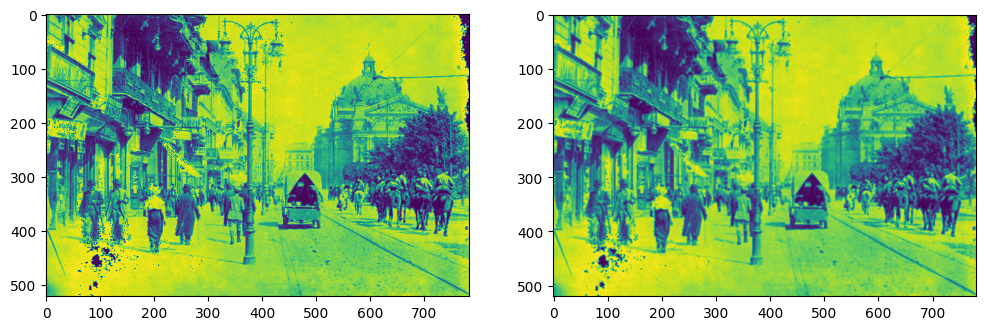

In [5]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(lviv)
axes[1].imshow(lviv_filtered);

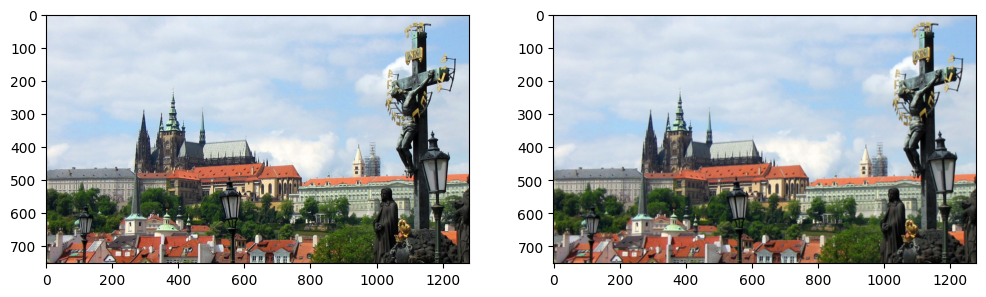

In [6]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(prague)
axes[1].imshow(prague_filtered);

The change is not easy to notice, but some micro-noise may be reduced due to this operation.

Now, let's try a bigger filter:

In [7]:
avg_filter = get_simple_avg_filter(10)
lviv_filtered = conv2d(lviv, avg_filter)
prague_filtered = conv2d_prague(avg_filter)

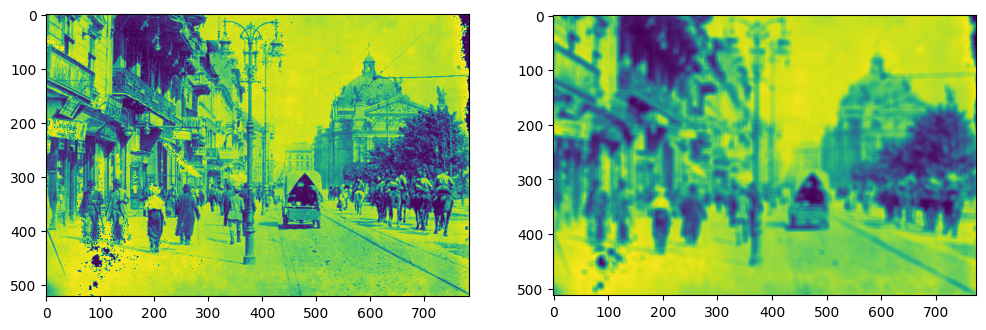

In [8]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(lviv)
axes[1].imshow(lviv_filtered);

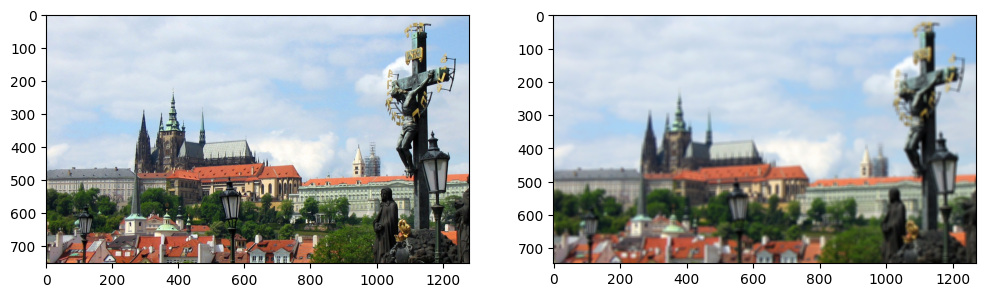

In [9]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(prague)
axes[1].imshow(prague_filtered);

This time, the filtering effect is significantly stronger. However, due to a big filter's size and its uniform weights,
we obtained blurred result.

We may obtain a better results by using a set of weights other than just the same ones. In a filter, the weight corresponding to the central
pixel in the convolution kernel can have a bigger value than pixels around.

We can utilize Gaussian filters - a type of weighted average filters, in whom the weights have values obtained with a 2D
Gaussian distribution.

In [10]:
from image_utils import gaussian2d_pdf

In [11]:
gaussian2d_pdf([1,1])

0.5778636748954609

In [12]:
def get_gaussian_filter(n: int) -> np.ndarray:
    output_kernel = np.zeros((n, n))
    middle = n // 2
    radius = 3
    for i in range(n):
        for j in range(n):
            i_deviation = (middle - i) / middle * radius
            j_deviation = (middle - j) / middle * radius
            output_kernel[i, j] = gaussian2d_pdf(
                np.array([0 - i_deviation, 0 - j_deviation])
            )
    return output_kernel / np.sum(output_kernel)

In [18]:
gaus_filter = get_gaussian_filter(10)
lviv_filtered = conv2d(lviv, gaus_filter)
prague_filtered = conv2d_prague(gaus_filter)

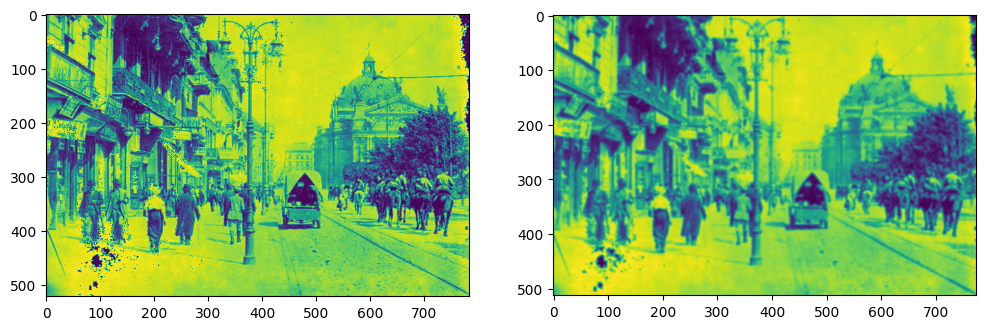

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(lviv)
axes[1].imshow(lviv_filtered);

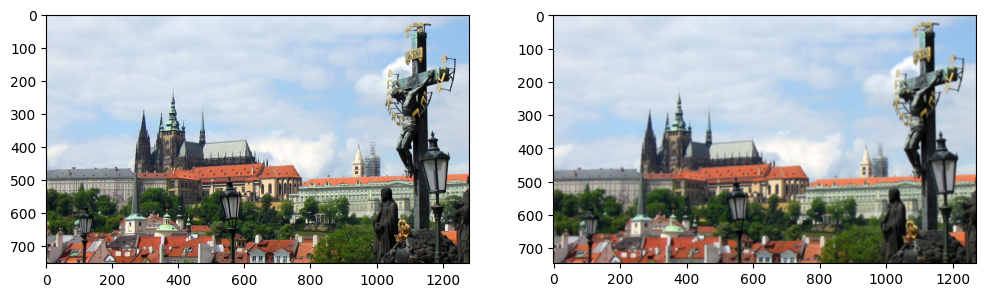

In [20]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].imshow(prague)
axes[1].imshow(prague_filtered);